In [43]:
## Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [44]:
#Read data
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [45]:
#Number of rows and columns 
heart_data.shape

(303, 15)

In [46]:
#Getting info 
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


<AxesSubplot:xlabel='Ca', ylabel='count'>

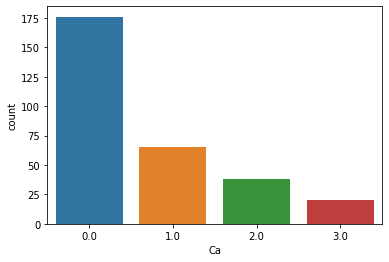

In [47]:
#Replace missing values in Ca
sns.countplot(data=heart_data, x='Ca')

<AxesSubplot:xlabel='RestBP', ylabel='Chol'>

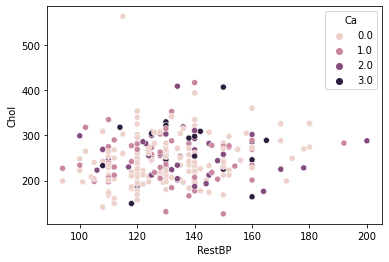

In [48]:
#Looking for correlation of Ca with other features
sns.scatterplot(data=heart_data, x='RestBP', y='Chol', hue='Ca')

In [49]:
heart_data.corr()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,-0.028458,0.046938
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832


In [50]:
# Replace missing values in Ca
heart_data.Ca = heart_data.Ca.apply(lambda x:0 if pd.isnull(x) else x)

<AxesSubplot:xlabel='Thal', ylabel='count'>

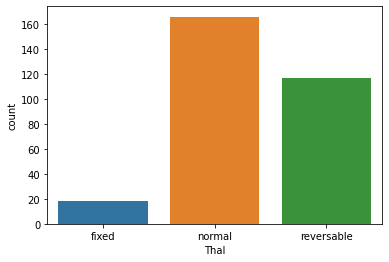

In [51]:
#Replace missing values in Thal
sns.countplot(data=heart_data, x='Thal')

<AxesSubplot:xlabel='MaxHR', ylabel='Chol'>

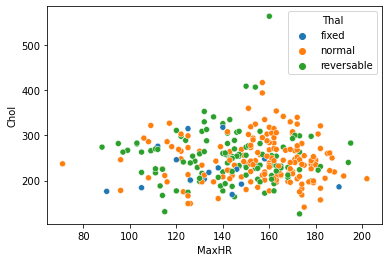

In [52]:
#Looking for correlation of Thal with other features
sns.scatterplot(data=heart_data, x='MaxHR', y='Chol', hue='Thal')

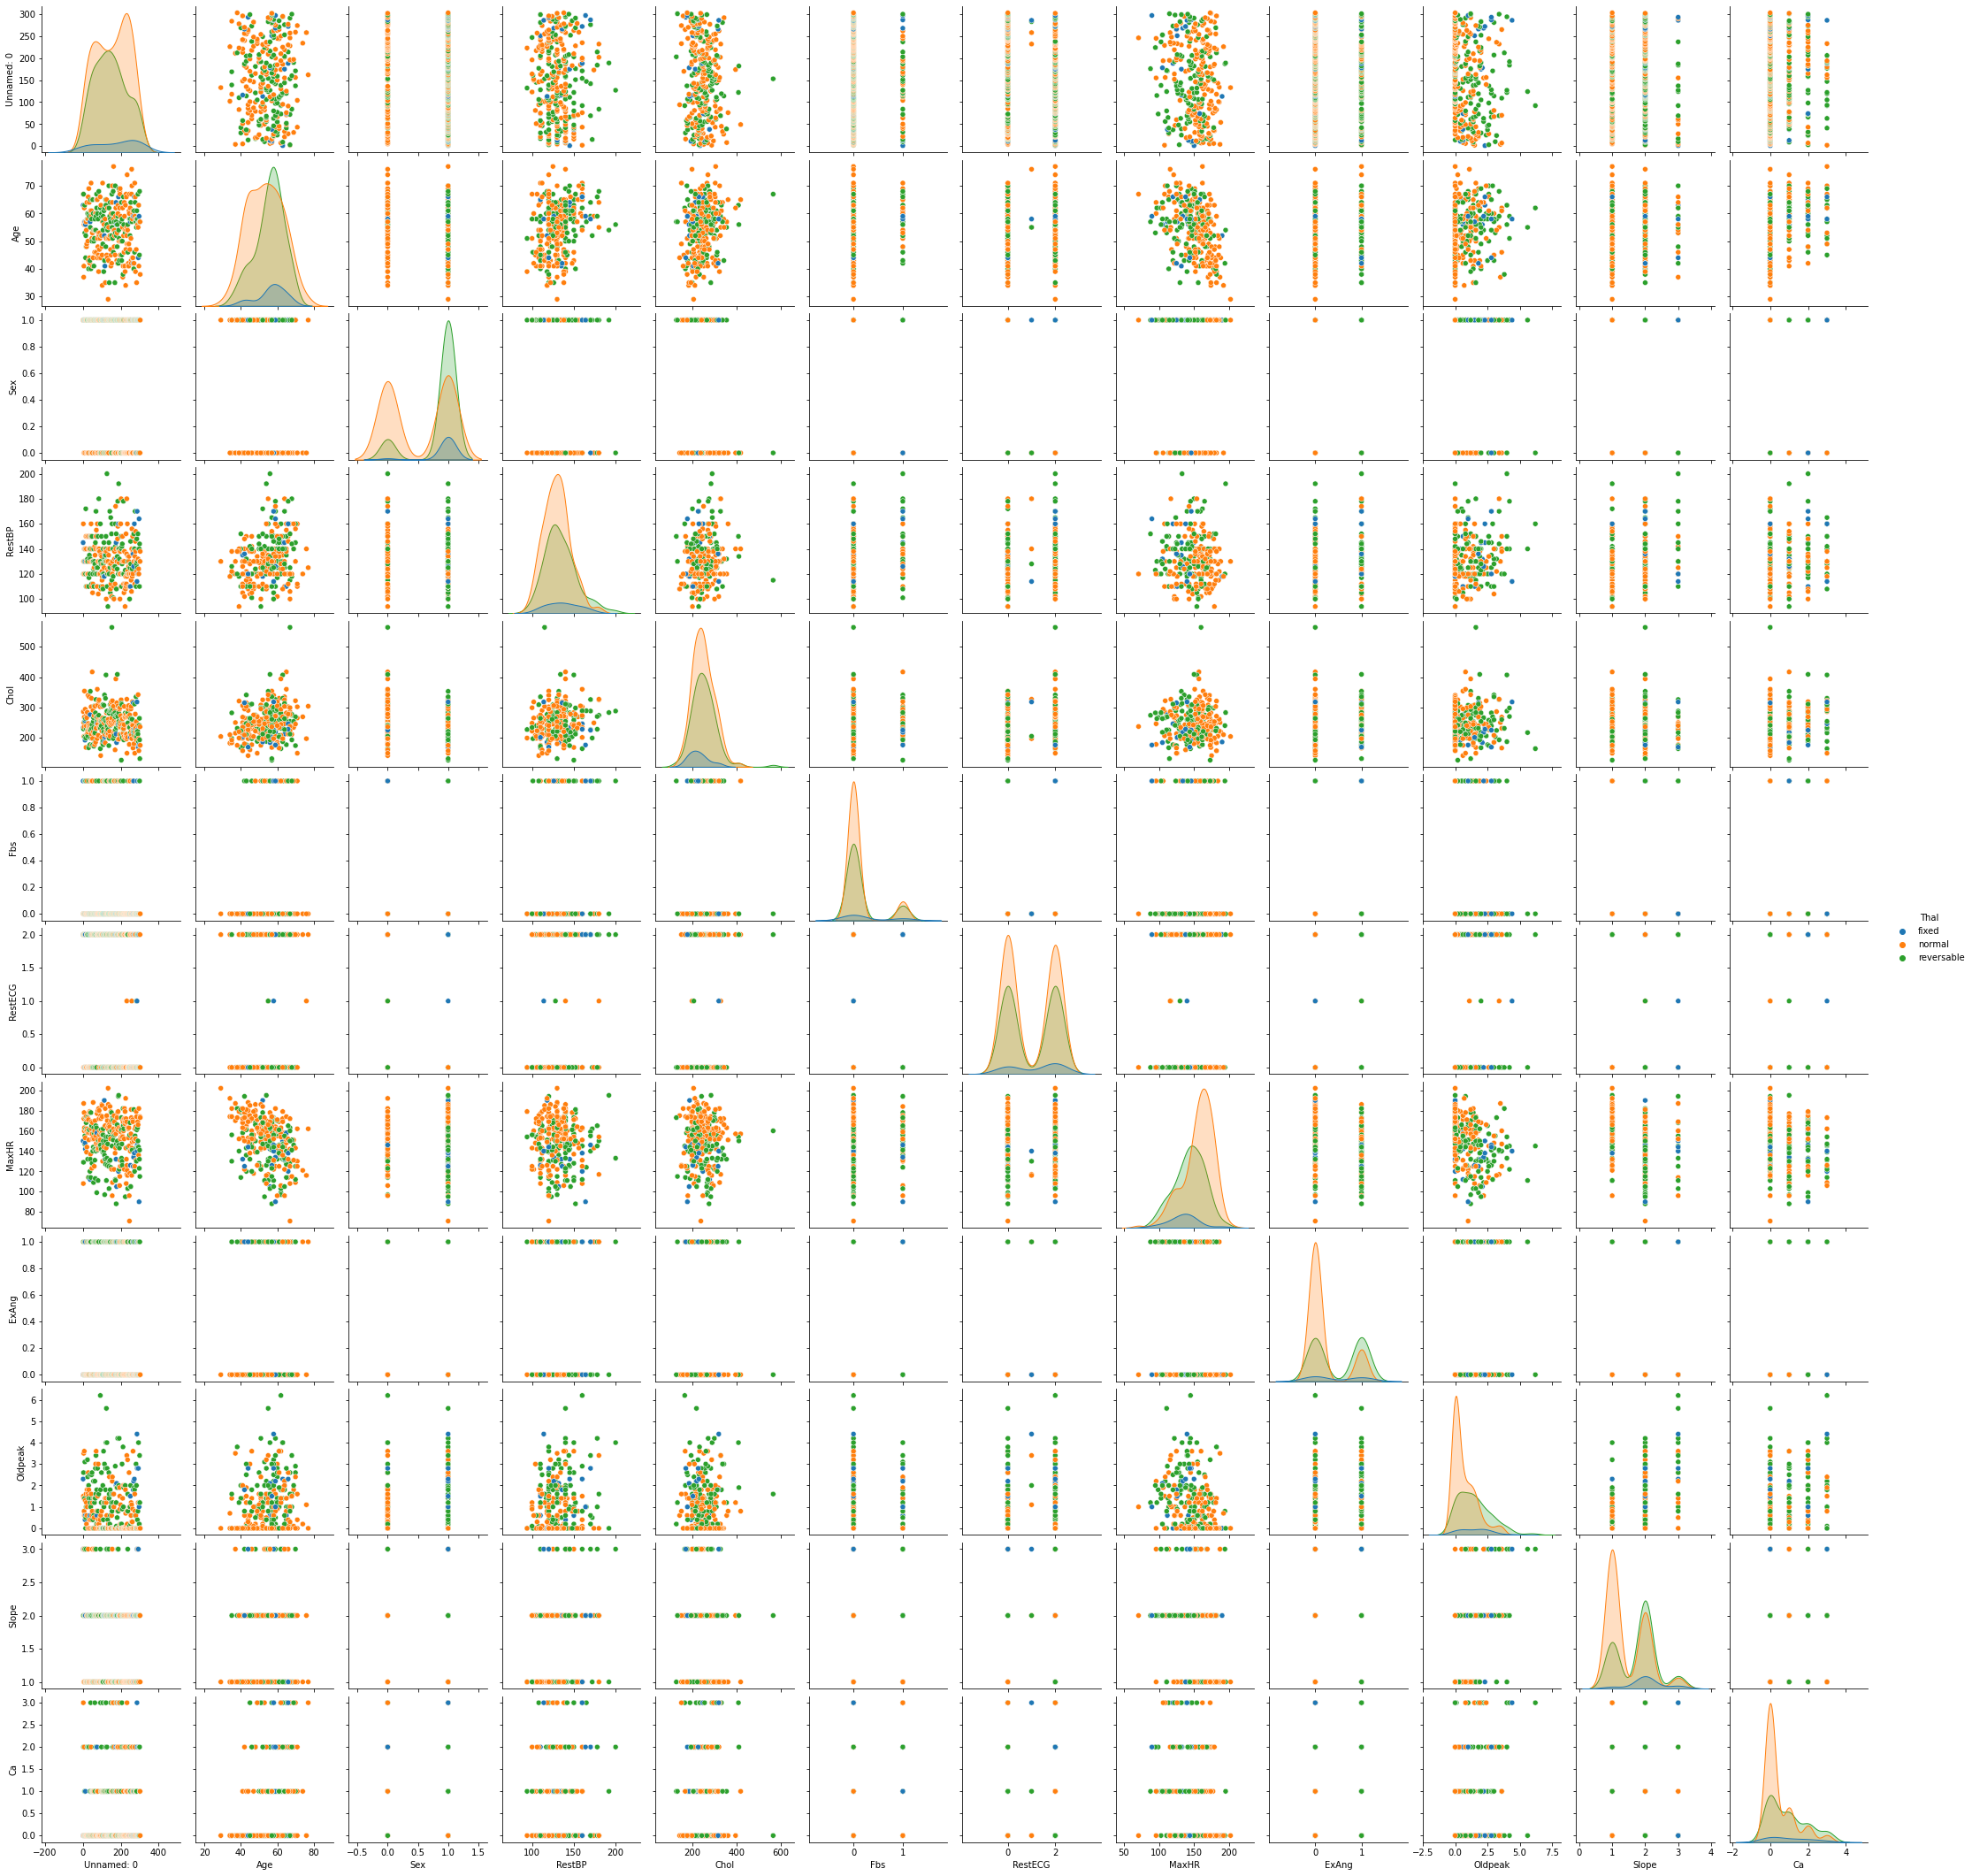

In [53]:
sns.pairplot(heart_data, hue='Thal')

In [54]:
# Replace missing values in Thal
heart_data.Thal = heart_data.Thal.apply(lambda x:"normal" if pd.isnull(x) else x)

In [55]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [56]:
# Data modification and cleaning
ChestPainUnique = heart_data.ChestPain.unique()

In [57]:
ChestPainUnique

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [58]:
for idx,value in enumerate(ChestPainUnique):
    heart_data.ChestPain = heart_data.ChestPain.apply(lambda x:idx if x == value else x)


In [59]:
ThalUnique = heart_data.Thal.unique()
for idx,value in enumerate(ThalUnique):
    heart_data.Thal = heart_data.Thal.apply(lambda x:idx if x == value else x)


In [60]:
heart_data.drop(columns = ['Unnamed: 0'],inplace = True)

In [61]:
heart_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.0,2,Yes
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2,Yes
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2,Yes
301,57,0,3,130,236,0,2,174,0,0.0,2,1.0,1,Yes


In [62]:
target = heart_data.AHD.unique()
for idx,value in enumerate(target):
    heart_data.AHD = heart_data.AHD.apply(lambda x:idx if x == value else x)

In [63]:
heart_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,1,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1.0,1,1


In [77]:
# Split the feature and the target
X = heart_data.drop(columns = ['AHD'])
y = heart_data.AHD
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state = 1234)

In [78]:
#Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.819672131147541